# MidtermExam-4510 Hint Code & Setup

Midtermexam-4510 is the official hint code for the midterm. Many exam questions are based on it.

**Before the exam**

*  Mount your Google Drive in Colab.

*  Place mpg.csv & diamonds_casestudy.csv in a folder you can access from the Drive mount (e.g., /content/drive/MyDrive/midterm/).

* Open Midtermexam-4510, update the file path to the CSV if needed, and make sure the notebook runs end-to-end without errors.

**During the exam**

* You will run the hint code and **edit/modify/expand** it to answer the questions.


If you can run the notebook and load midterm-customer.csv from your Drive mount, you’re ready.


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Regression (section 7.4)

In [18]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits import mplot3d

In [19]:
mpg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4510/2025-Fall-Lecture/MidtermExam-4510/mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [20]:
# Which origin has the largest average weight? Hint: use groupby --> usa
mpg.groupby('origin')['weight'].mean()

,weight
origin,
europe,2423.300000
japan,2221.227848
usa,3361.931727


#### Multiple Linear Regression

*  Independent variables = input features
*  dependent variable = target variable = output feature

In [21]:
# Remove the rows with missing values
mpg = mpg.dropna()


X=mpg[['acceleration','weight']].values.reshape(-1,2)  # order is important-> acceleration and weight
#input features --> accel & weight

# mpg = b0+ b1*acceleration + b2*weight

y=mpg[['mpg']].values.reshape(-1,1)


In [22]:
linModel = LinearRegression()
linModel.fit(X, y)

# Write the least squares model as an equation
print(
    "Predicted MPG = ",
    linModel.intercept_[0],
    " + ",
    linModel.coef_[0][0],
    "* (Acceleration)",
    " + ",
    linModel.coef_[0][1],
    "* (Weight)",
)

Predicted MPG =  41.095328779604245  +  0.26165039648878763 * (Acceleration)  +  -0.0072930951138257165 * (Weight)


In [23]:
yMultyPredicted = linModel.predict([[20, 3000]])

print(yMultyPredicted)

print(
    "Predicted MPG for a car with acceleration = 20 seconds and Weight = 3000 pounds \n",
    "using the multiple linear regression is ",
    yMultyPredicted[0][0],
    "miles per gallon",
)

[[24.44905137]]
Predicted MPG for a car with acceleration = 20 seconds and Weight = 3000 pounds 
 using the multiple linear regression is  24.449051367902847 miles per gallon


#### Polynomial Regression (only one variable)

In [24]:

X_1=mpg[['weight']].values.reshape(-1,1)

y_1=mpg[['mpg']].values.reshape(-1,1)



polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly1 = polyFeatures.fit_transform(X_1)
polyModel = LinearRegression()
polyModel.fit(xPoly1, y_1)

# Write the quadratic model as an equation
print(
    "Predicted MPG = ",
    polyModel.intercept_[0],
    " + ",
    polyModel.coef_[0][0],
    "* (Weight)",
    " + ",
    polyModel.coef_[0][1],
    "* (Weight)^2",
)

Predicted MPG =  62.25547397329214  +  -0.018495610572078984 * (Weight)  +  1.6965650653725319e-06 * (Weight)^2


In [9]:

polyInputs = polyFeatures.transform([[3000]])
yPolyPredicted = polyModel.predict(polyInputs)
print(yPolyPredicted)
print(
    "Predicted MPG for a car with Weight = 3000 pounds \n",
    "using the simple polynomial regression is ", yPolyPredicted[0][0], "miles per gallon",
)

[[22.03772785]]
Predicted MPG for a car with Weight = 3000 pounds 
 using the simple polynomial regression is  22.03772784540798 miles per gallon


## Diamonds

In [25]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns

In [26]:
# Import data and describe
diamonds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4510/2025-Fall-Lecture/MidtermExam-4510/diamonds_casestudy.csv')
diamonds.head(n=5)

,carat,cut,color,clarity,depth,table,price,width,length,height
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75




*   Carat: Size
*   Cut: Brilliance: Ideal -> Premium -> Very Good -> Good -> Fair -> Poor
*   Clarity: Nubmer of natural flaws: IF (best) -> VVS1 -> VVS2 -> VS1 -> VS2 -> SI1 -> SI2 -> I1 (worst)
*   Color: Celar to yellow tint: D-F (clear- Colorless) -> G-J (near colorless), K-M (yellow tint)

In [12]:
print(diamonds.shape) #how many rows?
print(len(diamonds))
diamonds.size


(53940, 10)
53940


539400

In [13]:
# boolean expression

#(diamonds.height > 5.43) & (diamonds["length"] > 9.5)

(diamonds.price > 20000) & (diamonds["carat"] > 2)

#diamonds['pirce'] >20000)

,0
0,False
1,False
2,False
3,False
4,False
...,...
53935,False
53936,False
53937,False
53938,False


In [14]:
#Count # of diamonds satisfying the conditions below:
((diamonds.price > 18000) & (diamonds["carat"] > 2.8)).sum()

# & -> and operator
#  | --> or operator

np.int64(12)

In [15]:
#which diamonds are satisfying the above condition? List them
diamonds[ (diamonds.price > 18000) & (diamonds["carat"] > 2.8) ]

,carat,cut,color,clarity,depth,table,price,width,length,height
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27514,3.01,Premium,I,SI2,60.2,59.0,18242,9.36,9.31,5.62
27515,3.01,Fair,I,SI2,65.8,56.0,18242,8.99,8.94,5.90
27516,3.01,Fair,I,SI2,65.8,56.0,18242,8.99,8.94,5.90
27517,3.01,Good,I,SI2,63.9,60.0,18242,9.06,9.01,5.77
27518,3.01,Good,I,SI2,63.9,60.0,18242,9.06,9.01,5.77
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27638,3.04,Premium,I,SI2,59.3,60.0,18559,9.51,9.46,5.62
27649,3.01,Good,H,SI2,57.6,64.0,18593,9.44,9.38,5.42
27679,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03


In [27]:
# Average price of the diamonds with Fair cut --> Hint: you should use gropuby

print(diamonds.groupby('cut')['price'].mean())

print("******************************************************")

#Another method:
print(diamonds.groupby(by = ['cut']).mean(numeric_only=True))
# Note that mean() can be applied to the columns with numerical values

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64
******************************************************
              carat      depth      table        price     width    length  \
cut                                                                          
Fair       1.046137  64.036839  59.053789  4358.757764  6.246894  6.182652   
Good       0.849185  62.365436  58.694639  3928.864452  5.838785  5.850744   
Ideal      0.702837  61.709344  55.951668  3457.541970  5.507451  5.520080   
Premium    0.891955  61.264177  58.746095  4584.257704  5.973887  5.944879   
Very Good  0.806381  61.817683  57.956150  3981.759891  5.740696  5.770026   

             height  
cut                  
Fair       3.982770  
Good       3.639507  
Ideal      3.401448  
Premium    3.647124  
Very Good  3.559801  


In [28]:
### Exam problem:

diamonds.groupby("color")['carat'].mean()

,carat
color,
D,0.657795
E,0.657867
F,0.736538
G,0.771190
H,0.911799
I,1.026927
J,1.162137


In [ ]:
from sklearn import preprocessing



In [ ]:
price_st_array = preprocessing.scale(diamonds.price)

diamonds['price_z'] = price_st_array

diamonds

#What is the z-value of the diamond price $326 --> answer: -0.904

,carat,cut,color,clarity,depth,table,price,width,length,height,price_z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-0.904095
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-0.904095
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-0.903844
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-0.902090
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-0.901839
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,-0.294731
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,-0.294731
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,-0.294731
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,-0.294731


In [ ]:
# missing values?
diamonds.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,50
table,0
price,0
width,0
length,0
height,0


In [ ]:
#What is the expression to replace the missing values for depth with its mean?

depth_mean = diamonds['depth'].mean() #you need to calculate the average/mean value of the column, depth

new_data_frame = diamonds[['depth']].fillna(value=depth_mean)  #Not going to change the orginal dataframe diamonds

print(new_data_frame)


       depth
0       61.5
1       59.8
2       56.9
3       62.4
4       63.3
...      ...
53935   60.8
53936   63.1
53937   62.8
53938   61.0
53939   62.2

[53940 rows x 1 columns]


In [ ]:
#If you want to permanently change the orignal datafrmae, diamonds

#diamonds['depth'] = diamonds[['depth']].fillna(value=depth_mean)
# Be carefull!! - don't this unless you want to change the original dataframe forever

#diamonds.isnull().sum()

### Log Regression (important for the extra credit quiz)

In [29]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [30]:
# Load the Wisconsin Breast Cancer dataset
WBCD = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/4510/2025-Fall-Lecture/CH7-Regression/data/WisconsinBreastCancerDatabase.csv")
WBCD.head()

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
WBCD[['Radius mean', 'Diagnosis']]  # column subsetting - Extra credit problem.

,Radius mean,Diagnosis
0,17.99,M
1,20.57,M
2,19.69,M
3,11.42,M
4,20.29,M
...,...,...
564,21.56,M
565,20.13,M
566,16.60,M
567,20.60,M


In [ ]:
WBCD.loc[0:5] #row subsetting

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [ ]:
WBCD.loc[WBCD['Diagnosis'] == 'M', 'Diagnosis']  # returns rows with Diagnosis == M and shows only Diaganosis column
WBCD.loc[WBCD['Diagnosis'] == 'M', 'Diagnosis'] = 1 # Diaganois column becomes 1 if Dianosis == M --> replace M with 1



WBCD.loc[WBCD['Diagnosis'] == 'B', 'Diagnosis'] = 0  # replace B with 0

WBCD[['Radius mean', 'Diagnosis']]

,Radius mean,Diagnosis
0,17.99,1
1,20.57,1
2,19.69,1
3,11.42,1
4,20.29,1
...,...,...
564,21.56,1
565,20.13,1
566,16.60,1
567,20.60,1


In [ ]:
# Store relevant columns as variables
X = WBCD[['Radius mean']].values.reshape(-1, 1)
#.values give the underlying Numpy array with the same shape (nsamples, 1)
#.reshape(-1, 1) tells Numpy "make it 2-D with 1 column"

y = WBCD[['Diagnosis']].values.reshape(-1, 1).astype(int)
#astype is used with Pandas DataFrames to convert data types in a column to
#integer type.

print(X) # X is a 2d array
print(y) # y is a 2d array
print(type(y))


[[17.99 ]
 [20.57 ]
 [19.69 ]
 [11.42 ]
 [20.29 ]
 [12.45 ]
 [18.25 ]
 [13.71 ]
 [13.   ]
 [12.46 ]
 [16.02 ]
 [15.78 ]
 [19.17 ]
 [15.85 ]
 [13.73 ]
 [14.54 ]
 [14.68 ]
 [16.13 ]
 [19.81 ]
 [13.54 ]
 [13.08 ]
 [ 9.504]
 [15.34 ]
 [21.16 ]
 [16.65 ]
 [17.14 ]
 [14.58 ]
 [18.61 ]
 [15.3  ]
 [17.57 ]
 [18.63 ]
 [11.84 ]
 [17.02 ]
 [19.27 ]
 [16.13 ]
 [16.74 ]
 [14.25 ]
 [13.03 ]
 [14.99 ]
 [13.48 ]
 [13.44 ]
 [10.95 ]
 [19.07 ]
 [13.28 ]
 [13.17 ]
 [18.65 ]
 [ 8.196]
 [13.17 ]
 [12.05 ]
 [13.49 ]
 [11.76 ]
 [13.64 ]
 [11.94 ]
 [18.22 ]
 [15.1  ]
 [11.52 ]
 [19.21 ]
 [14.71 ]
 [13.05 ]
 [ 8.618]
 [10.17 ]
 [ 8.598]
 [14.25 ]
 [ 9.173]
 [12.68 ]
 [14.78 ]
 [ 9.465]
 [11.31 ]
 [ 9.029]
 [12.78 ]
 [18.94 ]
 [ 8.888]
 [17.2  ]
 [13.8  ]
 [12.31 ]
 [16.07 ]
 [13.53 ]
 [18.05 ]
 [20.18 ]
 [12.86 ]
 [11.45 ]
 [13.34 ]
 [25.22 ]
 [19.1  ]
 [12.   ]
 [18.46 ]
 [14.48 ]
 [19.02 ]
 [12.36 ]
 [14.64 ]
 [14.62 ]
 [15.37 ]
 [13.27 ]
 [13.45 ]
 [15.06 ]
 [20.26 ]
 [12.18 ]
 [ 9.787]
 [11.6  ]
 [14.42 ]


In [ ]:
np.ravel(y.astype(int)) # Note that ravel flattens 2d array to 1d array

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
logisticModel = LogisticRegression()
logisticModel.fit(X, np.ravel(y.astype(int)))

LogisticRegression()

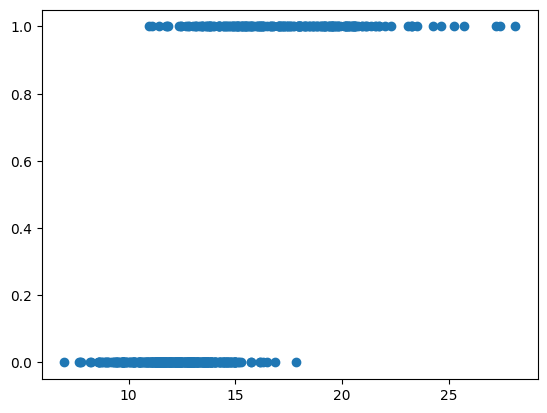

In [ ]:
plt.scatter(X,y)

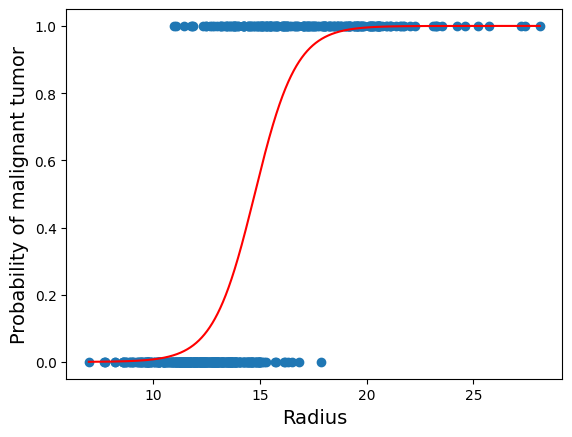

In [ ]:
plt.scatter(X,y)
xDelta = np.linspace(X.min(), X.max(), 10000)
yPredicted = logisticModel.predict(X).reshape(-1,1).astype(int) #either 0 or 1

#note that [:,1] is used below --> probability of tumor being malignant
yDeltaProb = logisticModel.predict_proba(xDelta.reshape(-1,1))[:,1]

plt.plot(xDelta, yDeltaProb, color ="red")
plt.xlabel("Radius", fontsize=14)
plt.ylabel("Probability of malignant tumor", fontsize=14)
plt.show()

In [ ]:
logisticModel.coef_

array([[1.02519623]])

In [ ]:
logisticModel.coef_[0][0]  #b1 value

np.float64(1.0251962293185457)

In [ ]:
logisticModel.intercept_   #b0  value

array([-15.12718591])

In [ ]:
pHatProb = logisticModel.predict_proba([[13]])
pHatProb
#This indicates the predicted probabilities for the two classes (Benign and Malignant)
#given an input feature value (e.g., Radius Mean of 13):

# 0.85: The model predicts an 85% probability that the tumor is Benign.
# 0.15: The model predicts a 15% probability that the tumor is Malignant.

array([[0.85810449, 0.14189551]])

In [ ]:
pHat = logisticModel.predict([[13]])
pHat

array([0])

### Training, validation, and test data set.

In [ ]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
trainingProportion = 0.70
validationProportion = 0.10
testProportion = 0.20



# Split off the test data
trainingAndValidationData, testData = train_test_split(
    WBCD, test_size=testProportion
)# Set the proportions of the training-validation-test split
#Note that test_size is used!



# Split the remaining into training and validation data
trainingData, validationData = train_test_split(
    WBCD,
    train_size=trainingProportion / (trainingProportion + validationProportion)
)
#Note that train_size is used instead of test_size!

In [ ]:
print(trainingData.shape) # training data set

(497, 32)
